In [11]:
'''Takes as input a file and asks for a year between 2009 and 2016 and prints the total number of bike, 
pedestrian, and motor vehicle accidents for that year'''

def year_totals(filename):
    import csv

    while True: 
        try:
            year = int(input('Please enter a 4-digit year between 2009 and 2016: '))
            if year >=2009 and year <= 2016:
                break
        except ValueError:
            print('Sorry that was a bad input.')

    year = str(year)

    Bike_fat = []
    Ped_fat = []
    mvo_fat = []

    with open(filename) as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['YR'] == year:
                num_bike = int(row['BikeFatali'])
                Bike_fat.append(num_bike)
                num_ped = int(row['PedFatalit'])
                Ped_fat.append(num_ped)
                num_mvo = int(row['MVOFatalit'])
                mvo_fat.append(num_mvo)
            
    bike_fatalities_by_year = sum(Bike_fat)
    Ped_fatalities_by_year = sum(Ped_fat)
    mvo_fatalities_by_year = sum(mvo_fat)

    print('Bike fatalities for {}:'.format(year), bike_fatalities_by_year) 
    print('Pedestrian fatalities for {}:'.format(year), Ped_fatalities_by_year)
    print('MVO fatalities for {}:'.format(year), mvo_fatalities_by_year)

In [12]:
year_totals('fatality_monthly.csv')

Please enter a 4-digit year between 2009 and 2016: 2010
Bike fatalities for 2010: 19
Pedestrian fatalities for 2010: 136
MVO fatalities for 2010: 65


In [6]:
import pandas as pd

In [7]:
fatalities = pd.read_csv('fatality_monthly.csv')

In [8]:
fatalities.head()

,Fatalities,PedFatalit,BikeFatali,MVOFatalit,Month,YR,nodeX,nodeY,STREET1,STREET2
0,2,2,0,0,1,2009,984998.4270,199212.2562,CATHERINE STREET,EAST BROADWAY
1,1,1,0,0,1,2009,985342.5733,200219.0389,BOWERY,MANHATTAN BR APPROACH
2,1,1,0,0,1,2009,988386.3762,173383.4210,36 STREET,CLARA STREET
3,1,1,0,0,1,2009,988972.3363,211707.8279,EAST 34 STREET,MADISON AVENUE
4,1,1,0,0,1,2009,996327.5575,161351.0701,EAST 17 STREET,KINGS HIGHWAY


In [9]:
from ggplot import *

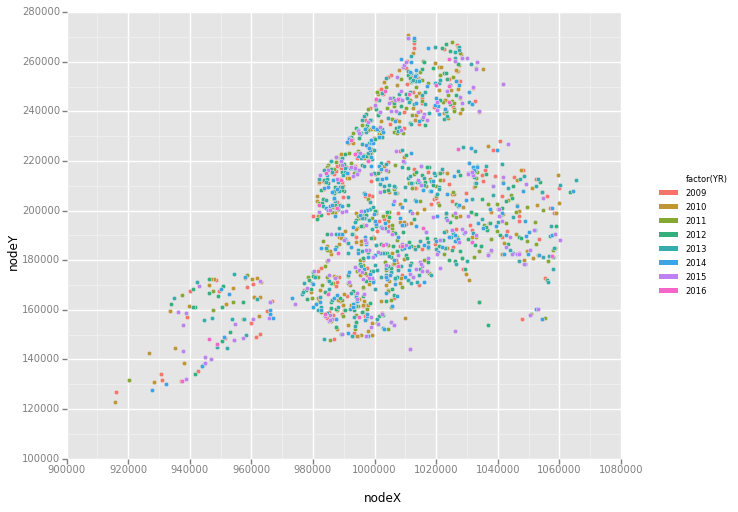

<ggplot: (271731071)>


In [10]:
%matplotlib inline 

df = pd.DataFrame({'nodeX':fatalities.loc[:,'nodeX'],
                   'nodeY':fatalities.loc[:,'nodeY'],
                   'YR':fatalities.loc[:,'YR']})

#NYC map of fatalitites from 2009-2016
print(ggplot(aes(x='nodeX', y='nodeY', color='factor(YR)'), data=df) + geom_point())